### House Price Predection with Pyspark

In [2]:
from pyspark.sql  import SparkSession
from pyspark.sql.functions import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import numpy as np
from pyspark.ml.feature import Imputer

In [3]:
spark = SparkSession.builder.appName("house price").getOrCreate()

In [4]:
spark

In [6]:
sdf = spark.read.csv("D:\Data Science\Python\House Price Predection in Pyspark\data\AmesHousing.csv",inferSchema=True,header=True)

In [23]:
sdf.head(1)

[Row(Order=1, PID=526301100, MS SubClass=20, MS Zoning='RL', Lot Frontage=141, Lot Area=31770, Street='Pave', Alley='NA', Lot Shape='IR1', Land Contour='Lvl', Utilities='AllPub', Lot Config='Corner', Land Slope='Gtl', Neighborhood='NAmes', Condition 1='Norm', Condition 2='Norm', Bldg Type='1Fam', House Style='1Story', Overall Qual=6, Overall Cond=5, Year Built=1960, Year Remod/Add=1960, Roof Style='Hip', Roof Matl='CompShg', Exterior 1st='BrkFace', Exterior 2nd='Plywood', Mas Vnr Type='Stone', Mas Vnr Area=112, Exter Qual='TA', Exter Cond='TA', Foundation='CBlock', Bsmt Qual='TA', Bsmt Cond='Gd', Bsmt Exposure='Gd', BsmtFin Type 1='BLQ', BsmtFin SF 1=639, BsmtFin Type 2='Unf', BsmtFin SF 2=0, Bsmt Unf SF=441, Total Bsmt SF=1080, Heating='GasA', Heating QC='Fa', Central Air='Y', Electrical='SBrkr', 1st Flr SF=1656, 2nd Flr SF=0, Low Qual Fin SF=0, Gr Liv Area=1656, Bsmt Full Bath=1, Bsmt Half Bath=0, Full Bath=1, Half Bath=0, Bedroom AbvGr=3, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms A

In [8]:
sdf.printSchema()

root
 |-- Order: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MS SubClass: integer (nullable = true)
 |-- MS Zoning: string (nullable = true)
 |-- Lot Frontage: integer (nullable = true)
 |-- Lot Area: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- Lot Shape: string (nullable = true)
 |-- Land Contour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- Lot Config: string (nullable = true)
 |-- Land Slope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition 1: string (nullable = true)
 |-- Condition 2: string (nullable = true)
 |-- Bldg Type: string (nullable = true)
 |-- House Style: string (nullable = true)
 |-- Overall Qual: integer (nullable = true)
 |-- Overall Cond: integer (nullable = true)
 |-- Year Built: integer (nullable = true)
 |-- Year Remod/Add: integer (nullable = true)
 |-- Roof Style: string (nullable = true)
 |-- Roof Matl: string (nulla

## Data Analysis

In [9]:
sdf.describe().toPandas()

,summary,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,count,2930,2930,2930,2930,2440,2930,2930,2930,2930,...,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
1,mean,1465.5,7.144644969887372E8,57.38737201365188,None,69.22459016393442,10147.921843003413,None,None,None,...,2.243344709897611,None,None,None,50.63515358361775,6.216040955631399,2007.790443686007,None,None,180796.0600682594
2,stddev,845.9624696167082,1.8873084464939E8,42.638024553802154,None,23.36533497450341,7880.017759439098,None,None,None,...,35.59718061509771,None,None,None,566.3442882590897,2.7144924254301683,1.3166129226075387,None,None,79886.692356665
3,min,1,526301100,20,A (agr),21,1300,Grvl,Grvl,IR1,...,0,Ex,GdPrv,Elev,0,1,2006,COD,Abnorml,12789
4,max,2930,1007100110,190,RM,313,215245,Pave,Pave,Reg,...,800,TA,NA,TenC,17000,12,2010,WD,Partial,755000


In [10]:
sdf.select("Alley").head(8)

[Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA'),
 Row(Alley='NA')]

In [11]:
display(sdf.select("Mas Vnr Type").head(5))

[Row(Mas Vnr Type='Stone'),
 Row(Mas Vnr Type='None'),
 Row(Mas Vnr Type='BrkFace'),
 Row(Mas Vnr Type='None'),
 Row(Mas Vnr Type='None')]

In [12]:
null = sdf.select([count(when( isnan(c) | col(c).isNull() | col(c).contains("NA") ,c)).alias(c) for c in sdf.columns])


In [13]:
type(null)

pyspark.sql.dataframe.DataFrame

In [14]:
# to show all the columns in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
display(null)

DataFrame[Order: bigint, PID: bigint, MS SubClass: bigint, MS Zoning: bigint, Lot Frontage: bigint, Lot Area: bigint, Street: bigint, Alley: bigint, Lot Shape: bigint, Land Contour: bigint, Utilities: bigint, Lot Config: bigint, Land Slope: bigint, Neighborhood: bigint, Condition 1: bigint, Condition 2: bigint, Bldg Type: bigint, House Style: bigint, Overall Qual: bigint, Overall Cond: bigint, Year Built: bigint, Year Remod/Add: bigint, Roof Style: bigint, Roof Matl: bigint, Exterior 1st: bigint, Exterior 2nd: bigint, Mas Vnr Type: bigint, Mas Vnr Area: bigint, Exter Qual: bigint, Exter Cond: bigint, Foundation: bigint, Bsmt Qual: bigint, Bsmt Cond: bigint, Bsmt Exposure: bigint, BsmtFin Type 1: bigint, BsmtFin SF 1: bigint, BsmtFin Type 2: bigint, BsmtFin SF 2: bigint, Bsmt Unf SF: bigint, Total Bsmt SF: bigint, Heating: bigint, Heating QC: bigint, Central Air: bigint, Electrical: bigint, 1st Flr SF: bigint, 2nd Flr SF: bigint, Low Qual Fin SF: bigint, Gr Liv Area: bigint, Bsmt Full B

In [16]:
print(null.collect()[0][4] )

490


In [17]:
features_with_null = [f for ind,f in enumerate(null.columns) if null.collect()[0][ind] > 0]

In [18]:
len(features_with_null)


28

## Find the relation between sale price to null values

In [19]:
full = sdf.toPandas()
pdf = full.drop(["PID",'Order'],axis=1)
series = pdf.corrwith(pdf['SalePrice'])
corr = pd.DataFrame({'Features' : series.index , 'Corr': series.values })
top = corr[(corr.Corr >= 0.3 ) | (corr.Corr <= -0.3)]
len(top)

18

In [20]:
for feature in null.columns:
    data = sdf.toPandas()
    print(f'{feature} : {data[feature].dtype}')

Order : int32
PID : int32
MS SubClass : int32
MS Zoning : object
Lot Frontage : float64
Lot Area : int32
Street : object
Alley : object
Lot Shape : object
Land Contour : object
Utilities : object
Lot Config : object
Land Slope : object
Neighborhood : object
Condition 1 : object
Condition 2 : object
Bldg Type : object
House Style : object
Overall Qual : int32
Overall Cond : int32
Year Built : int32
Year Remod/Add : int32
Roof Style : object
Roof Matl : object
Exterior 1st : object
Exterior 2nd : object
Mas Vnr Type : object
Mas Vnr Area : float64
Exter Qual : object
Exter Cond : object
Foundation : object
Bsmt Qual : object
Bsmt Cond : object
Bsmt Exposure : object
BsmtFin Type 1 : object
BsmtFin SF 1 : float64
BsmtFin Type 2 : object
BsmtFin SF 2 : float64
Bsmt Unf SF : float64
Total Bsmt SF : float64
Heating : object
Heating QC : object
Central Air : object
Electrical : object
1st Flr SF : int32
2nd Flr SF : int32
Low Qual Fin SF : int32
Gr Liv Area : int32
Bsmt Full Bath : float64
Bs

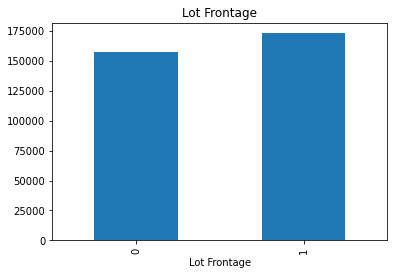

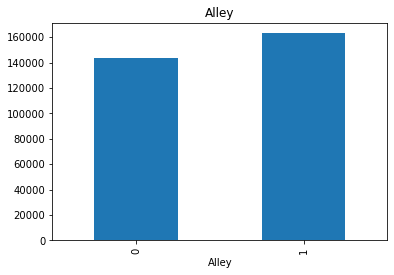

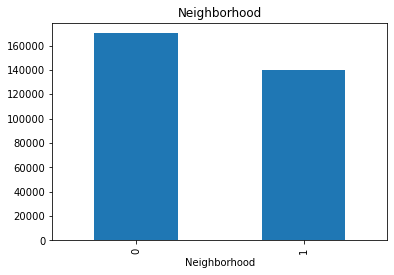

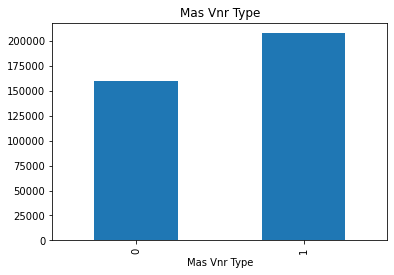

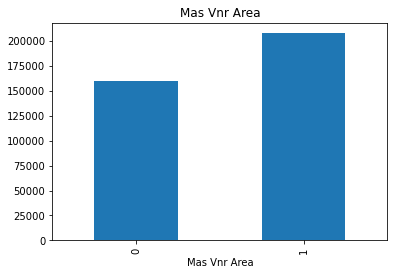

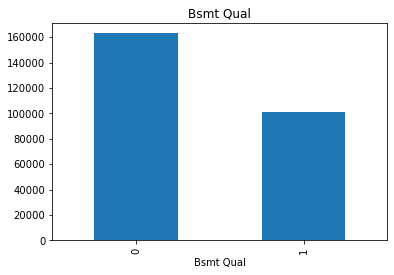

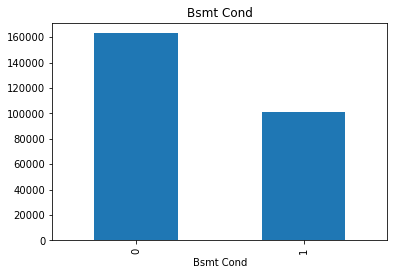

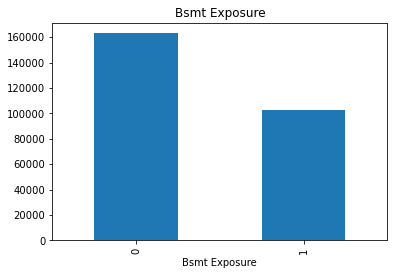

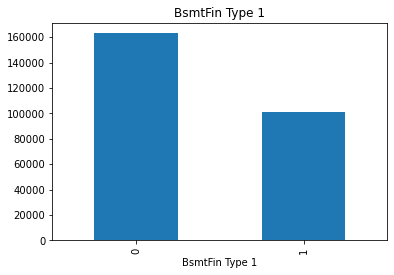

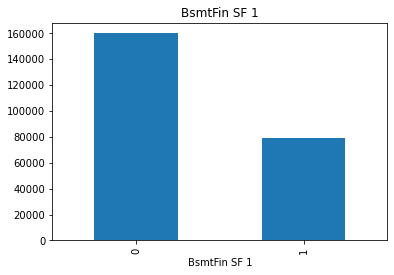

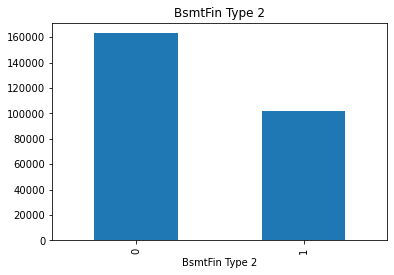

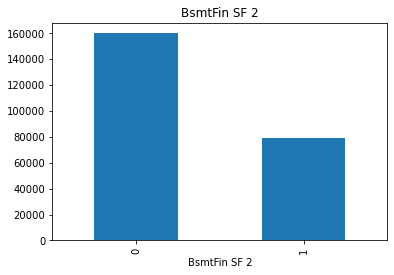

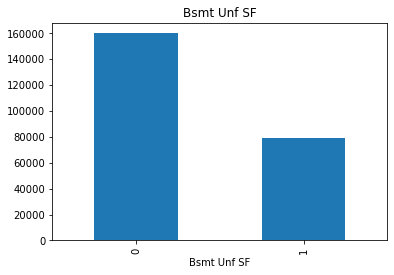

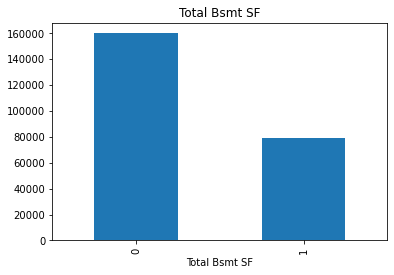

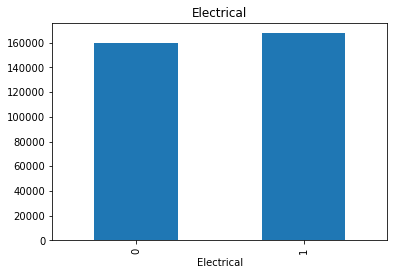

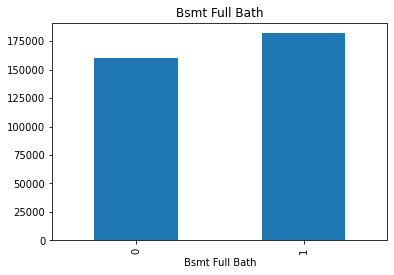

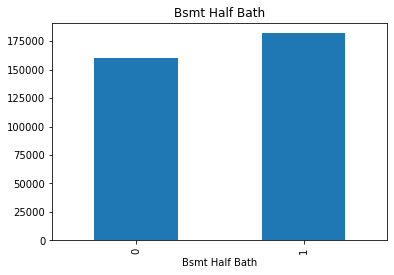

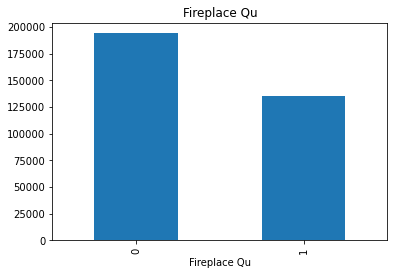

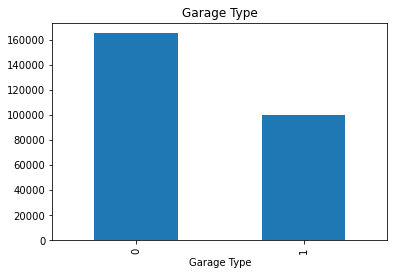

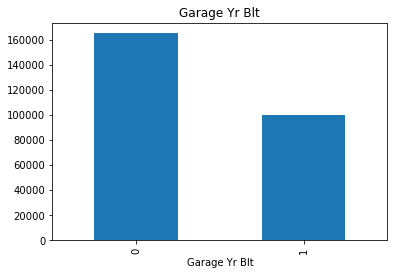

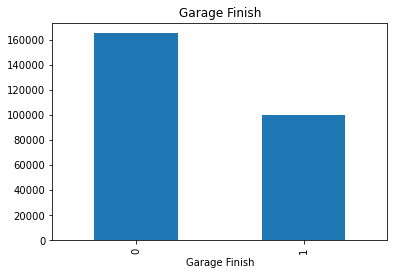

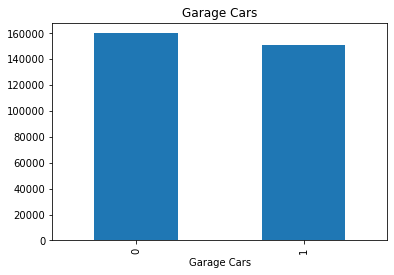

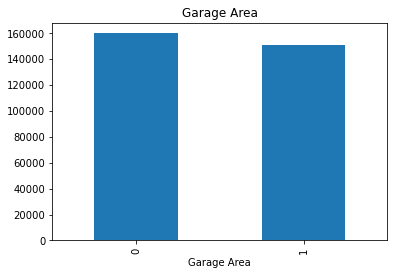

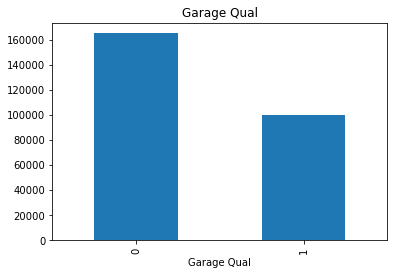

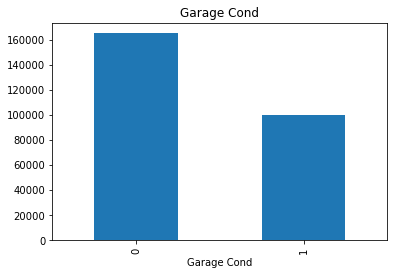

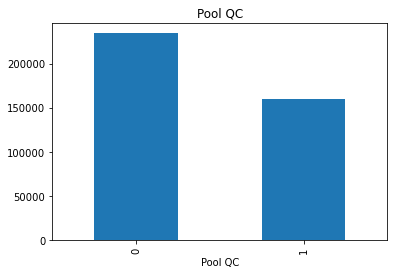

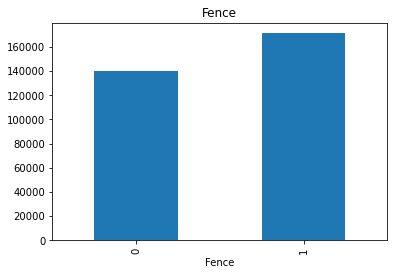

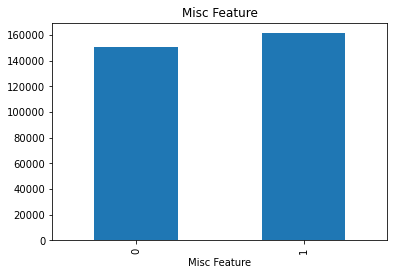

In [22]:
for feature in features_with_null:
    data = sdf.toPandas()
    
    if data[feature].dtype == object:
        data[feature] = np.where(data[feature].isnull() | data[feature].str.contains("NA") ,1,0) 
    else:
        data[feature] = np.where(data[feature].isnull() ,1,0) 
    
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()
    

In [31]:
data = sdf.toPandas()

numarical_features = [ feature for feature in data.columns if data[feature].dtype != "object"] 

In [32]:
print(len(numarical_features))

39


In [33]:
display(sdf.select(numarical_features).head(2))

[Row(Order=1, PID=526301100, MS SubClass=20, Lot Frontage=141, Lot Area=31770, Overall Qual=6, Overall Cond=5, Year Built=1960, Year Remod/Add=1960, Mas Vnr Area=112, BsmtFin SF 1=639, BsmtFin SF 2=0, Bsmt Unf SF=441, Total Bsmt SF=1080, 1st Flr SF=1656, 2nd Flr SF=0, Low Qual Fin SF=0, Gr Liv Area=1656, Bsmt Full Bath=1, Bsmt Half Bath=0, Full Bath=1, Half Bath=0, Bedroom AbvGr=3, Kitchen AbvGr=1, TotRms AbvGrd=7, Fireplaces=2, Garage Yr Blt=1960, Garage Cars=2, Garage Area=528, Wood Deck SF=210, Open Porch SF=62, Enclosed Porch=0, 3Ssn Porch=0, Screen Porch=0, Pool Area=0, Misc Val=0, Mo Sold=5, Yr Sold=2010, SalePrice=215000),
 Row(Order=2, PID=526350040, MS SubClass=20, Lot Frontage=80, Lot Area=11622, Overall Qual=5, Overall Cond=6, Year Built=1961, Year Remod/Add=1961, Mas Vnr Area=0, BsmtFin SF 1=468, BsmtFin SF 2=144, Bsmt Unf SF=270, Total Bsmt SF=882, 1st Flr SF=896, 2nd Flr SF=0, Low Qual Fin SF=0, Gr Liv Area=896, Bsmt Full Bath=0, Bsmt Half Bath=0, Full Bath=1, Half Bath=0

In [34]:
year_features = [feature for feature in sdf.columns if "Year" in feature or "Yr" in feature] 

In [35]:
display(sdf.select(year_features).head(10))

[Row(Year Built=1960, Year Remod/Add=1960, Garage Yr Blt=1960, Yr Sold=2010),
 Row(Year Built=1961, Year Remod/Add=1961, Garage Yr Blt=1961, Yr Sold=2010),
 Row(Year Built=1958, Year Remod/Add=1958, Garage Yr Blt=1958, Yr Sold=2010),
 Row(Year Built=1968, Year Remod/Add=1968, Garage Yr Blt=1968, Yr Sold=2010),
 Row(Year Built=1997, Year Remod/Add=1998, Garage Yr Blt=1997, Yr Sold=2010),
 Row(Year Built=1998, Year Remod/Add=1998, Garage Yr Blt=1998, Yr Sold=2010),
 Row(Year Built=2001, Year Remod/Add=2001, Garage Yr Blt=2001, Yr Sold=2010),
 Row(Year Built=1992, Year Remod/Add=1992, Garage Yr Blt=1992, Yr Sold=2010),
 Row(Year Built=1995, Year Remod/Add=1996, Garage Yr Blt=1995, Yr Sold=2010),
 Row(Year Built=1999, Year Remod/Add=1999, Garage Yr Blt=1999, Yr Sold=2010)]

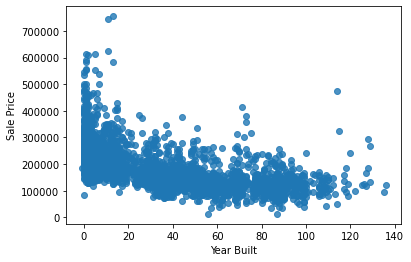

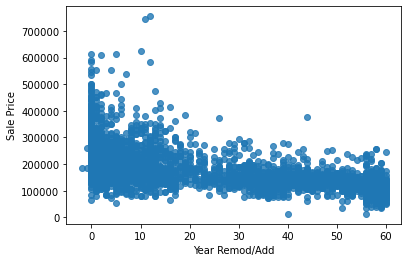

In [36]:
for feature in year_features:
    if feature != 'Yr Sold' and feature != 'Garage Yr Blt':
        data = sdf.select(year_features).toPandas()
        data[feature] = data["Yr Sold"] - data[feature]
        plt.scatter(data[feature],sdf.select("SalePrice").toPandas(),alpha=0.8)
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()
        

#### Discrete Numarical Features

In [37]:
display(sdf.select("Lot Area").distinct().count())

1960

In [38]:
kn = sdf.select(numarical_features).toPandas()
discreate = [feature for feature in numarical_features if len(kn[feature].unique()) < 25 and feature not in year_features+["PID","Order"]]

In [39]:
len(discreate)

14

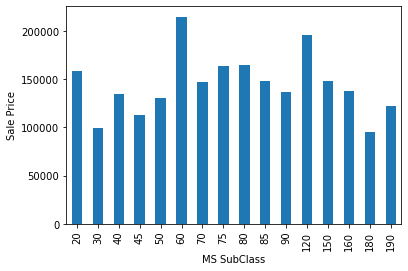

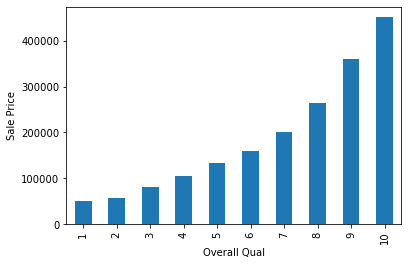

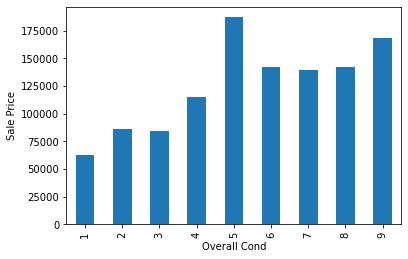

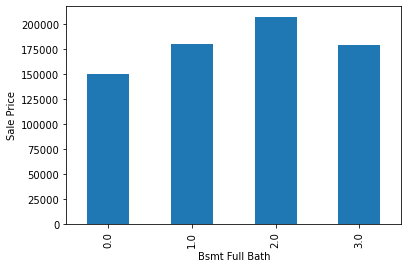

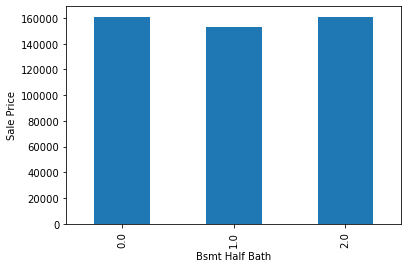

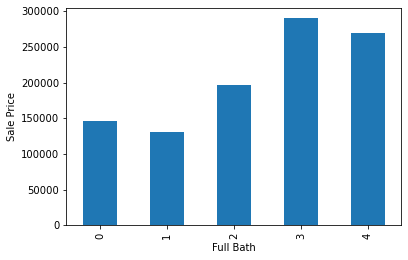

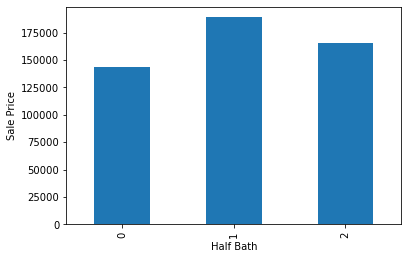

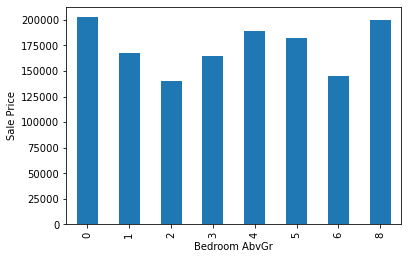

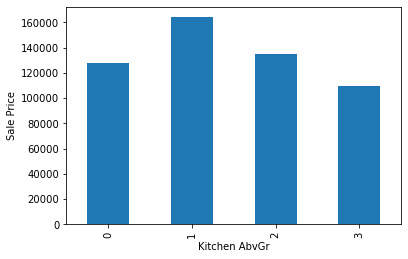

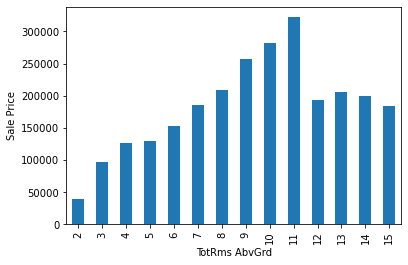

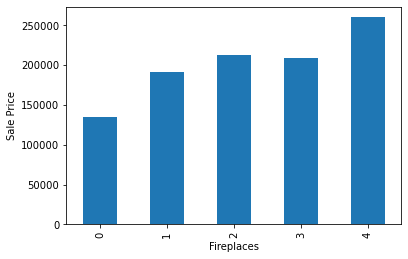

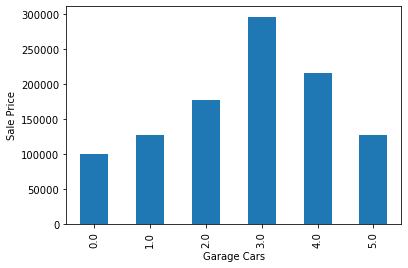

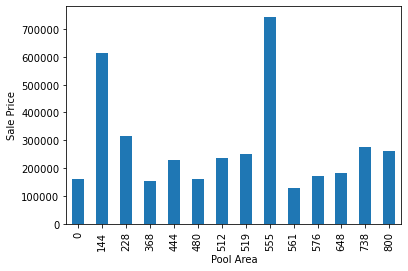

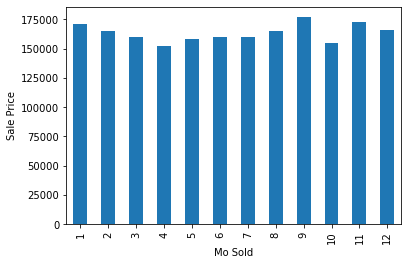

In [40]:
for feature in discreate:
    data = sdf.toPandas()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()


#### Continuous Numerical Features

In [41]:
continuous_features = [feature for feature in numarical_features if feature not in discreate and feature not in year_features +["PID","Order"]]

In [42]:
len(continuous_features)

19

In [43]:
print(continuous_features)

['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val', 'SalePrice']


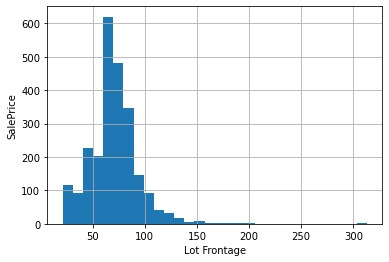

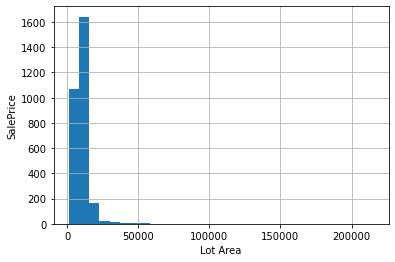

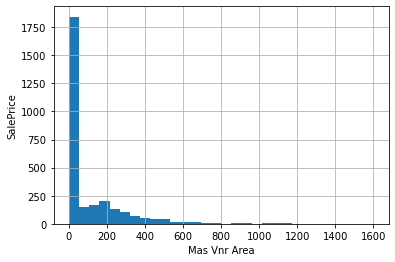

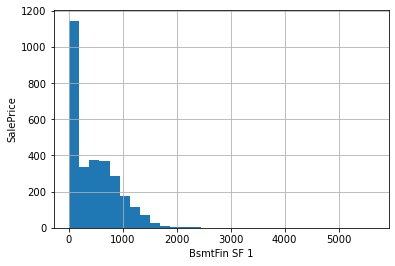

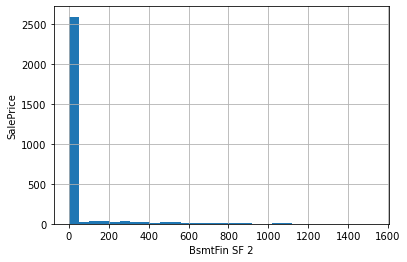

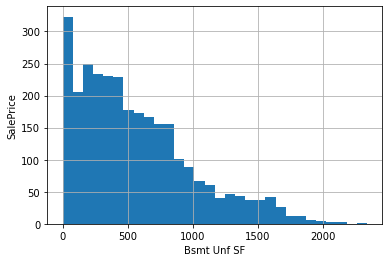

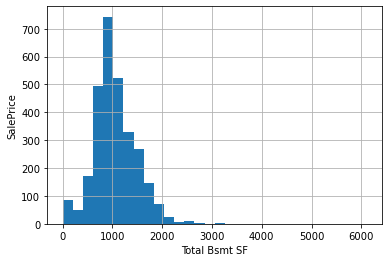

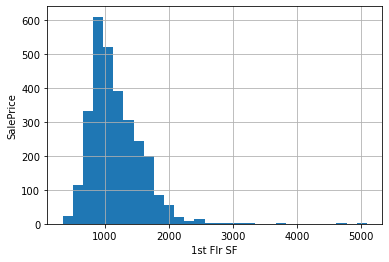

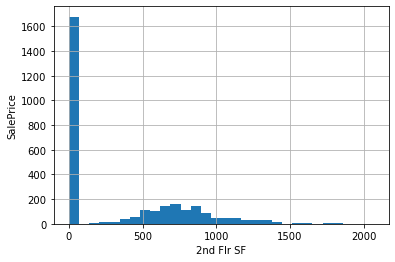

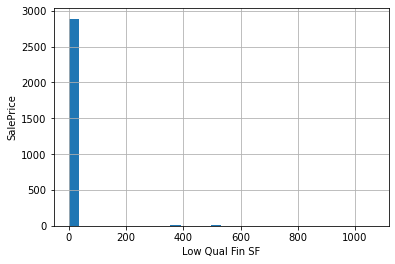

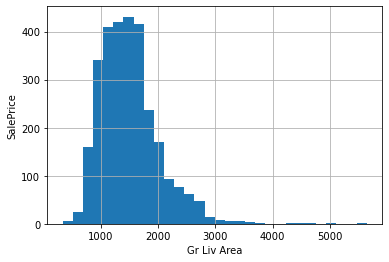

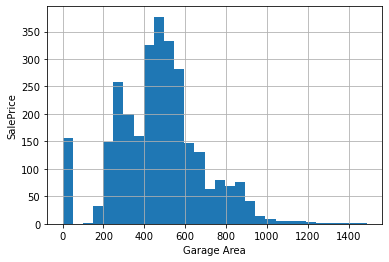

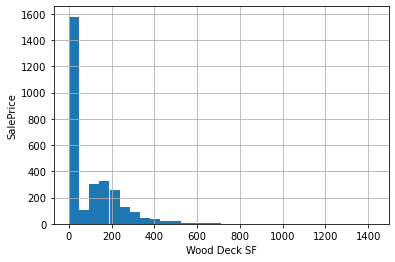

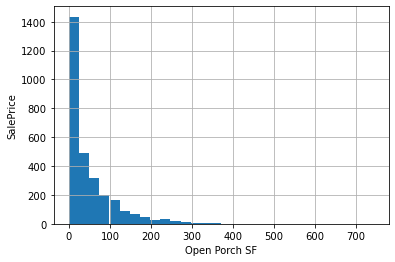

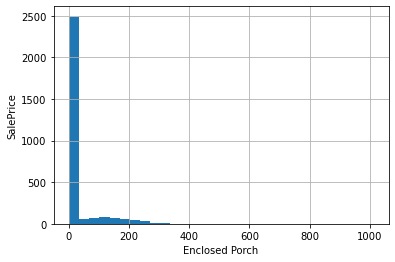

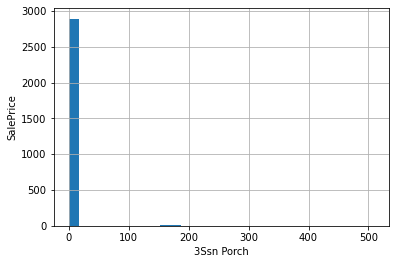

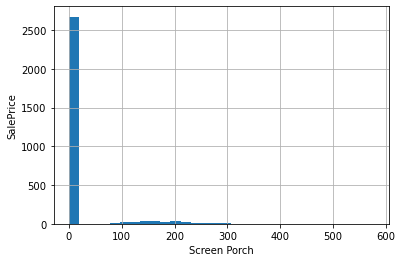

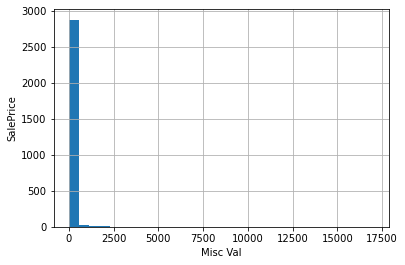

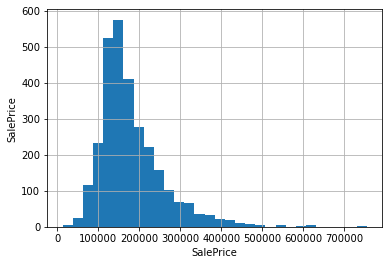

In [45]:
for feature in continuous_features:
    data = sdf.select(continuous_features).toPandas()
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()
     

### Categorical Features

In [47]:
data = sdf.toPandas()

categorical_feature = [feature for feature in data.columns if data[feature].dtype == "object"]

In [48]:
print(categorical_feature)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [49]:
len(categorical_feature)

43

In [50]:
display(sdf.select(categorical_feature).head(20))

[Row(MS Zoning='RL', Street='Pave', Alley='NA', Lot Shape='IR1', Land Contour='Lvl', Utilities='AllPub', Lot Config='Corner', Land Slope='Gtl', Neighborhood='NAmes', Condition 1='Norm', Condition 2='Norm', Bldg Type='1Fam', House Style='1Story', Roof Style='Hip', Roof Matl='CompShg', Exterior 1st='BrkFace', Exterior 2nd='Plywood', Mas Vnr Type='Stone', Exter Qual='TA', Exter Cond='TA', Foundation='CBlock', Bsmt Qual='TA', Bsmt Cond='Gd', Bsmt Exposure='Gd', BsmtFin Type 1='BLQ', BsmtFin Type 2='Unf', Heating='GasA', Heating QC='Fa', Central Air='Y', Electrical='SBrkr', Kitchen Qual='TA', Functional='Typ', Fireplace Qu='Gd', Garage Type='Attchd', Garage Finish='Fin', Garage Qual='TA', Garage Cond='TA', Paved Drive='P', Pool QC='NA', Fence='NA', Misc Feature='NA', Sale Type='WD ', Sale Condition='Normal'),
 Row(MS Zoning='RH', Street='Pave', Alley='NA', Lot Shape='Reg', Land Contour='Lvl', Utilities='AllPub', Lot Config='Inside', Land Slope='Gtl', Neighborhood='NAmes', Condition 1='Feedr

In [51]:
# for feature in categorical_feature:
#     data = sdf.toPandas()
#     data.groupby(feature)['SalePrice'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel("Sale Price")
#     plt.show()

#### Outliers

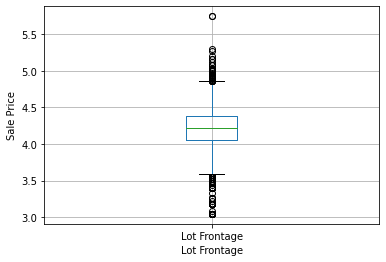

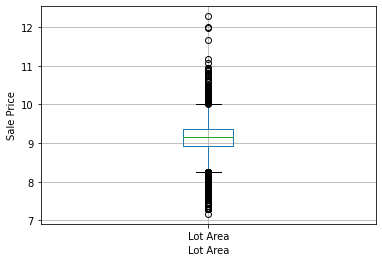

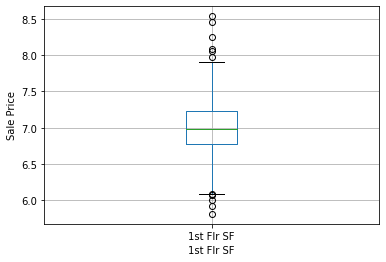

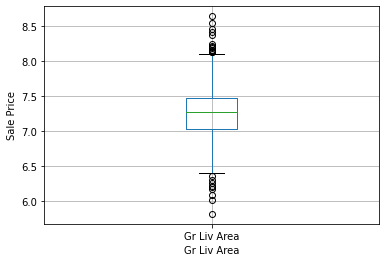

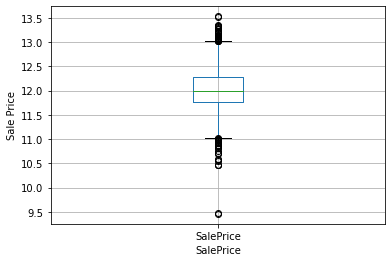

In [52]:
for feature in continuous_features:
    data = sdf.toPandas()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(feature)
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

## Feature Engineering

#### Replacing Null Values

#### Categorical Features

In [53]:
no_na = sdf.na.replace("NA","Missing")

In [54]:
display(no_na.select([count(when( isnan(c) | col(c).isNull() ,c)).alias(c) for c in no_na.columns]))

DataFrame[Order: bigint, PID: bigint, MS SubClass: bigint, MS Zoning: bigint, Lot Frontage: bigint, Lot Area: bigint, Street: bigint, Alley: bigint, Lot Shape: bigint, Land Contour: bigint, Utilities: bigint, Lot Config: bigint, Land Slope: bigint, Neighborhood: bigint, Condition 1: bigint, Condition 2: bigint, Bldg Type: bigint, House Style: bigint, Overall Qual: bigint, Overall Cond: bigint, Year Built: bigint, Year Remod/Add: bigint, Roof Style: bigint, Roof Matl: bigint, Exterior 1st: bigint, Exterior 2nd: bigint, Mas Vnr Type: bigint, Mas Vnr Area: bigint, Exter Qual: bigint, Exter Cond: bigint, Foundation: bigint, Bsmt Qual: bigint, Bsmt Cond: bigint, Bsmt Exposure: bigint, BsmtFin Type 1: bigint, BsmtFin SF 1: bigint, BsmtFin Type 2: bigint, BsmtFin SF 2: bigint, Bsmt Unf SF: bigint, Total Bsmt SF: bigint, Heating: bigint, Heating QC: bigint, Central Air: bigint, Electrical: bigint, 1st Flr SF: bigint, 2nd Flr SF: bigint, Low Qual Fin SF: bigint, Gr Liv Area: bigint, Bsmt Full B

In [55]:
# Here NA is not null it is a value 
display(no_na.groupBy("Neighborhood").count())

DataFrame[Neighborhood: string, count: bigint]

#### Numarical Features

In [56]:
display(no_na.count())
    

2930

In [57]:
display(no_na.describe())

DataFrame[summary: string, Order: string, PID: string, MS SubClass: string, MS Zoning: string, Lot Frontage: string, Lot Area: string, Street: string, Alley: string, Lot Shape: string, Land Contour: string, Utilities: string, Lot Config: string, Land Slope: string, Neighborhood: string, Condition 1: string, Condition 2: string, Bldg Type: string, House Style: string, Overall Qual: string, Overall Cond: string, Year Built: string, Year Remod/Add: string, Roof Style: string, Roof Matl: string, Exterior 1st: string, Exterior 2nd: string, Mas Vnr Type: string, Mas Vnr Area: string, Exter Qual: string, Exter Cond: string, Foundation: string, Bsmt Qual: string, Bsmt Cond: string, Bsmt Exposure: string, BsmtFin Type 1: string, BsmtFin SF 1: string, BsmtFin Type 2: string, BsmtFin SF 2: string, Bsmt Unf SF: string, Total Bsmt SF: string, Heating: string, Heating QC: string, Central Air: string, Electrical: string, 1st Flr SF: string, 2nd Flr SF: string, Low Qual Fin SF: string, Gr Liv Area: st

In [58]:
# no_null = no_na.fillna(value=mean("Lot Frontage"),subset=['Lot Frontage'])
# display(no_null.filter(no_na['Lot Frontage'].isNull()))

In [59]:
display(no_na['Lot Frontage'].isNull())

Column<'(Lot Frontage IS NULL)'>

In [60]:
# Droping nan/ None
no_na1 = no_na.na.drop()
display(no_na1.count())

2269

#### We can not drop the null values because we are losing over 600 data points

### So we use imputers

In [61]:
imputer = Imputer(
    inputCols=numarical_features,
    outputCols= [ f'{feature}_imputed' for feature in numarical_features ],
    ).setStrategy("mean")

In [62]:
# from pyspark.sql.types import IntegerType 
# for f in numarical_features:     
#     no_l = no_na.withColumn(f, no_na[f].cast(IntegerType()))

In [63]:
temp_no_null = imputer.fit(no_na).transform(no_na)

In [64]:
# display(temp_no_null)

In [65]:
display(len(numarical_features))

39

In [66]:
display(len(temp_no_null.columns))

121

In [67]:
without_null = temp_no_null.drop(*numarical_features)

In [68]:
len(without_null.columns)

82

In [69]:
display(without_null.head(5))

[Row(MS Zoning='RL', Street='Pave', Alley='Missing', Lot Shape='IR1', Land Contour='Lvl', Utilities='AllPub', Lot Config='Corner', Land Slope='Gtl', Neighborhood='NAmes', Condition 1='Norm', Condition 2='Norm', Bldg Type='1Fam', House Style='1Story', Roof Style='Hip', Roof Matl='CompShg', Exterior 1st='BrkFace', Exterior 2nd='Plywood', Mas Vnr Type='Stone', Exter Qual='TA', Exter Cond='TA', Foundation='CBlock', Bsmt Qual='TA', Bsmt Cond='Gd', Bsmt Exposure='Gd', BsmtFin Type 1='BLQ', BsmtFin Type 2='Unf', Heating='GasA', Heating QC='Fa', Central Air='Y', Electrical='SBrkr', Kitchen Qual='TA', Functional='Typ', Fireplace Qu='Gd', Garage Type='Attchd', Garage Finish='Fin', Garage Qual='TA', Garage Cond='TA', Paved Drive='P', Pool QC='Missing', Fence='Missing', Misc Feature='Missing', Sale Type='WD ', Sale Condition='Normal', Order_imputed=1, PID_imputed=526301100, MS SubClass_imputed=20, Lot Frontage_imputed=141, Lot Area_imputed=31770, Overall Qual_imputed=6, Overall Cond_imputed=5, Yea

In [70]:
numarical_features = [ s + "_imputed" for s in numarical_features ] 

num = without_null.select(numarical_features)

In [71]:
# Checking for null/none values
display(num.select([count(when( isnan(c) | col(c).isNull()  ,c)).alias(c) for c in num.columns])) 

DataFrame[Order_imputed: bigint, PID_imputed: bigint, MS SubClass_imputed: bigint, Lot Frontage_imputed: bigint, Lot Area_imputed: bigint, Overall Qual_imputed: bigint, Overall Cond_imputed: bigint, Year Built_imputed: bigint, Year Remod/Add_imputed: bigint, Mas Vnr Area_imputed: bigint, BsmtFin SF 1_imputed: bigint, BsmtFin SF 2_imputed: bigint, Bsmt Unf SF_imputed: bigint, Total Bsmt SF_imputed: bigint, 1st Flr SF_imputed: bigint, 2nd Flr SF_imputed: bigint, Low Qual Fin SF_imputed: bigint, Gr Liv Area_imputed: bigint, Bsmt Full Bath_imputed: bigint, Bsmt Half Bath_imputed: bigint, Full Bath_imputed: bigint, Half Bath_imputed: bigint, Bedroom AbvGr_imputed: bigint, Kitchen AbvGr_imputed: bigint, TotRms AbvGrd_imputed: bigint, Fireplaces_imputed: bigint, Garage Yr Blt_imputed: bigint, Garage Cars_imputed: bigint, Garage Area_imputed: bigint, Wood Deck SF_imputed: bigint, Open Porch SF_imputed: bigint, Enclosed Porch_imputed: bigint, 3Ssn Porch_imputed: bigint, Screen Porch_imputed: bi

#### Categorical Missing values

In [72]:
no_null_data = without_null.fillna("Missing") 
no_null_data = no_null_data.drop(*["PID_imputed","Order_imputed"])
k = ['Order_imputed', 'PID_imputed']
numarical_features = [ f for f in numarical_features if f not in k ]

In [73]:
display(no_null_data.select([count(when( isnan(c) | col(c).isNull()  ,c)).alias(c) for c in no_null_data.columns])) 

DataFrame[MS Zoning: bigint, Street: bigint, Alley: bigint, Lot Shape: bigint, Land Contour: bigint, Utilities: bigint, Lot Config: bigint, Land Slope: bigint, Neighborhood: bigint, Condition 1: bigint, Condition 2: bigint, Bldg Type: bigint, House Style: bigint, Roof Style: bigint, Roof Matl: bigint, Exterior 1st: bigint, Exterior 2nd: bigint, Mas Vnr Type: bigint, Exter Qual: bigint, Exter Cond: bigint, Foundation: bigint, Bsmt Qual: bigint, Bsmt Cond: bigint, Bsmt Exposure: bigint, BsmtFin Type 1: bigint, BsmtFin Type 2: bigint, Heating: bigint, Heating QC: bigint, Central Air: bigint, Electrical: bigint, Kitchen Qual: bigint, Functional: bigint, Fireplace Qu: bigint, Garage Type: bigint, Garage Finish: bigint, Garage Qual: bigint, Garage Cond: bigint, Paved Drive: bigint, Pool QC: bigint, Fence: bigint, Misc Feature: bigint, Sale Type: bigint, Sale Condition: bigint, MS SubClass_imputed: bigint, Lot Frontage_imputed: bigint, Lot Area_imputed: bigint, Overall Qual_imputed: bigint, O

In [74]:
len(no_null_data.columns)

80

### Handling Outliers using IQR

In [75]:
display(no_null_data.count())

2930

In [76]:
from pyspark.sql import functions as f 

def find_outliers(df,num):

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numarical_features:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        
        df = df.withColumn("is_outlier_"+column,when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
        
        new = df.where(df["is_outlier_"+column] != 1 )
        
        new = new.drop(*[column for column in new.columns if column.startswith("is_outlier_")])

    return new
    

In [77]:
 outlier = find_outliers(no_null_data,numarical_features)

In [78]:
display(outlier.count())

2793

#### Over 200 rows are removed

In [79]:
print(outlier.columns)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition', 'MS SubClass_imputed', 'Lot Frontage_imputed', 'Lot Area_imputed', 'Overall Qual_imputed', 'Overall Cond_imputed', 'Year Built_imputed', 'Year Remod/Add_imputed', 'Mas Vnr Area_imputed', 'BsmtFin SF 1_imputed', 'BsmtFin SF 2_imputed', 'Bsmt Unf SF_imputed', 'Total Bsmt SF_imputed', '1st Flr SF_imputed', '2nd Flr SF_imputed', 'Low Qual Fin SF_imputed', 'Gr Liv Area_imputed', 'Bsmt 

#### Handling Categorical Feature with OneHotEncoding

In [80]:
from pyspark.ml.feature import StringIndexer,VectorAssembler,OneHotEncoder,StandardScaler


indexer = StringIndexer(inputCols=categorical_feature,outputCols=[feature+"_Index" for feature in categorical_feature])
indexed  =  indexer.fit(outlier).transform(outlier)
new_indexed = indexed.drop(*categorical_feature)


In [81]:
display(new_indexed.head(5))

[Row(MS SubClass_imputed=20, Lot Frontage_imputed=141, Lot Area_imputed=31770, Overall Qual_imputed=6, Overall Cond_imputed=5, Year Built_imputed=1960, Year Remod/Add_imputed=1960, Mas Vnr Area_imputed=112, BsmtFin SF 1_imputed=639, BsmtFin SF 2_imputed=0, Bsmt Unf SF_imputed=441, Total Bsmt SF_imputed=1080, 1st Flr SF_imputed=1656, 2nd Flr SF_imputed=0, Low Qual Fin SF_imputed=0, Gr Liv Area_imputed=1656, Bsmt Full Bath_imputed=1, Bsmt Half Bath_imputed=0, Full Bath_imputed=1, Half Bath_imputed=0, Bedroom AbvGr_imputed=3, Kitchen AbvGr_imputed=1, TotRms AbvGrd_imputed=7, Fireplaces_imputed=2, Garage Yr Blt_imputed=1960, Garage Cars_imputed=2, Garage Area_imputed=528, Wood Deck SF_imputed=210, Open Porch SF_imputed=62, Enclosed Porch_imputed=0, 3Ssn Porch_imputed=0, Screen Porch_imputed=0, Pool Area_imputed=0, Misc Val_imputed=0, Mo Sold_imputed=5, Yr Sold_imputed=2010, SalePrice_imputed=215000, MS Zoning_Index=0.0, Street_Index=0.0, Alley_Index=0.0, Lot Shape_Index=1.0, Land Contour_I

In [82]:
#Encoder
encoder = OneHotEncoder(inputCols=[feature+"_Index" for feature in categorical_feature] , outputCols=[feature+"_encoded" for feature in categorical_feature] , dropLast=True )

encoded = encoder.fit(new_indexed).transform(new_indexed)

new_encoded = encoded.drop(*[feature+"_Index" for feature in categorical_feature])


In [83]:
display(new_encoded.head(10))

[Row(MS SubClass_imputed=20, Lot Frontage_imputed=141, Lot Area_imputed=31770, Overall Qual_imputed=6, Overall Cond_imputed=5, Year Built_imputed=1960, Year Remod/Add_imputed=1960, Mas Vnr Area_imputed=112, BsmtFin SF 1_imputed=639, BsmtFin SF 2_imputed=0, Bsmt Unf SF_imputed=441, Total Bsmt SF_imputed=1080, 1st Flr SF_imputed=1656, 2nd Flr SF_imputed=0, Low Qual Fin SF_imputed=0, Gr Liv Area_imputed=1656, Bsmt Full Bath_imputed=1, Bsmt Half Bath_imputed=0, Full Bath_imputed=1, Half Bath_imputed=0, Bedroom AbvGr_imputed=3, Kitchen AbvGr_imputed=1, TotRms AbvGrd_imputed=7, Fireplaces_imputed=2, Garage Yr Blt_imputed=1960, Garage Cars_imputed=2, Garage Area_imputed=528, Wood Deck SF_imputed=210, Open Porch SF_imputed=62, Enclosed Porch_imputed=0, 3Ssn Porch_imputed=0, Screen Porch_imputed=0, Pool Area_imputed=0, Misc Val_imputed=0, Mo Sold_imputed=5, Yr Sold_imputed=2010, SalePrice_imputed=215000, MS Zoning_encoded=SparseVector(6, {0: 1.0}), Street_encoded=SparseVector(1, {0: 1.0}), Alle

#### Creating victor of oneHotEncoding Colunms

In [84]:
encoded_col = [feature+"_encoded" for feature in categorical_feature]

category_Assemble = VectorAssembler(inputCols=encoded_col,outputCol='Category_Vector')

category_full = category_Assemble.transform(new_encoded)

category_feature = category_full.drop(*encoded_col)



In [85]:
display(category_feature.head(5))

[Row(MS SubClass_imputed=20, Lot Frontage_imputed=141, Lot Area_imputed=31770, Overall Qual_imputed=6, Overall Cond_imputed=5, Year Built_imputed=1960, Year Remod/Add_imputed=1960, Mas Vnr Area_imputed=112, BsmtFin SF 1_imputed=639, BsmtFin SF 2_imputed=0, Bsmt Unf SF_imputed=441, Total Bsmt SF_imputed=1080, 1st Flr SF_imputed=1656, 2nd Flr SF_imputed=0, Low Qual Fin SF_imputed=0, Gr Liv Area_imputed=1656, Bsmt Full Bath_imputed=1, Bsmt Half Bath_imputed=0, Full Bath_imputed=1, Half Bath_imputed=0, Bedroom AbvGr_imputed=3, Kitchen AbvGr_imputed=1, TotRms AbvGrd_imputed=7, Fireplaces_imputed=2, Garage Yr Blt_imputed=1960, Garage Cars_imputed=2, Garage Area_imputed=528, Wood Deck SF_imputed=210, Open Porch SF_imputed=62, Enclosed Porch_imputed=0, 3Ssn Porch_imputed=0, Screen Porch_imputed=0, Pool Area_imputed=0, Misc Val_imputed=0, Mo Sold_imputed=5, Yr Sold_imputed=2010, SalePrice_imputed=215000, Category_Vector=SparseVector(241, {0: 1.0, 6: 1.0, 7: 1.0, 10: 1.0, 12: 1.0, 15: 1.0, 18: 1

#### Creating vector for numerical values

In [86]:
num_Vector = VectorAssembler(inputCols=[ features for features in numarical_features if features != "SalePrice_imputed" ] , outputCol='Number_feature')
num = num_Vector.transform(category_feature)
num_feature = num.drop(*[ features for features in numarical_features if features != "SalePrice_imputed" ] )


In [87]:
display(num_feature.head(5))

[Row(SalePrice_imputed=215000, Category_Vector=SparseVector(241, {0: 1.0, 6: 1.0, 7: 1.0, 10: 1.0, 12: 1.0, 15: 1.0, 18: 1.0, 21: 1.0, 23: 1.0, 50: 1.0, 58: 1.0, 65: 1.0, 69: 1.0, 77: 1.0, 81: 1.0, 94: 1.0, 107: 1.0, 121: 1.0, 124: 1.0, 127: 1.0, 131: 1.0, 136: 1.0, 142: 1.0, 149: 1.0, 154: 1.0, 156: 1.0, 162: 1.0, 170: 1.0, 171: 1.0, 172: 1.0, 177: 1.0, 181: 1.0, 189: 1.0, 193: 1.0, 201: 1.0, 202: 1.0, 207: 1.0, 214: 1.0, 218: 1.0, 222: 1.0, 227: 1.0, 236: 1.0}), Number_feature=DenseVector([20.0, 141.0, 31770.0, 6.0, 5.0, 1960.0, 1960.0, 112.0, 639.0, 0.0, 441.0, 1080.0, 1656.0, 0.0, 0.0, 1656.0, 1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 7.0, 2.0, 1960.0, 2.0, 528.0, 210.0, 62.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2010.0])),
 Row(SalePrice_imputed=105000, Category_Vector=SparseVector(241, {3: 1.0, 6: 1.0, 7: 1.0, 9: 1.0, 12: 1.0, 15: 1.0, 17: 1.0, 21: 1.0, 23: 1.0, 51: 1.0, 58: 1.0, 65: 1.0, 69: 1.0, 76: 1.0, 81: 1.0, 88: 1.0, 103: 1.0, 119: 1.0, 124: 1.0, 127: 1.0, 131: 1.0, 136: 1.0, 141: 1.0, 146: 

In [88]:
num_feature.columns

['SalePrice_imputed', 'Category_Vector', 'Number_feature']

### Standard Scaler

In [89]:
forScaling = VectorAssembler(inputCols=['Category_Vector', 'Number_feature'],outputCol="forScaling")

In [90]:
scl = forScaling.transform(num_feature)

In [91]:
std_scaler = StandardScaler(inputCol="forScaling",outputCol='features')

In [92]:
scaled = std_scaler.fit(scl).transform(scl)

In [93]:
final_df = scaled.drop(*['forScaling',"Number_feature","Category_Vector"])

In [94]:
final_df.select("features").show()

+--------------------+
|            features|
+--------------------+
|(277,[0,6,7,10,12...|
|(277,[3,6,7,9,12,...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,10,14...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,10,13...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,9,12,...|
|(277,[0,6,7,10,12...|
|(277,[0,6,7,9,12,...|
+--------------------+
only showing top 20 rows



### Train Test Split

In [95]:
split = final_df.randomSplit([0.75,0.25])
train = split[0]
test = split[1]

In [96]:
train.count()

2086

In [97]:
display(train.select("features",'SalePrice_imputed'))

DataFrame[features: vector, SalePrice_imputed: int]

In [98]:
test.count()

707

### RandomForestRegressor

In [99]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol='features',labelCol='SalePrice_imputed')

rf_model = rf.fit(train)


In [100]:
predection = rf_model.transform(test)
predection.select("prediction","SalePrice_imputed").show()

+------------------+-----------------+
|        prediction|SalePrice_imputed|
+------------------+-----------------+
| 70332.47699489196|            35000|
|  87594.6888173258|            37900|
| 73913.71532528903|            44000|
|112823.25792867616|            50000|
|102525.54295251993|            50138|
| 78817.41281101327|            51689|
| 96910.06084653398|            52000|
|  81998.6831499902|            55000|
| 94625.51075949342|            58500|
| 80096.81867206378|            60000|
| 90066.45559755366|            61000|
|109818.09560075586|            63000|
| 75133.58354891902|            64000|
|113777.86446196717|            67000|
| 90822.39906476797|            73000|
|100340.33607336084|            75000|
| 102159.8910941155|            75190|
| 93237.23499812001|            76000|
|122063.93756159468|            76500|
|109987.23201266727|            78000|
+------------------+-----------------+
only showing top 20 rows



In [101]:
from pyspark.ml.evaluation import RegressionEvaluator

rf_evaluator = RegressionEvaluator(predictionCol='prediction',labelCol='SalePrice_imputed',metricName='rmse')

print(rf_evaluator.evaluate(predection))


22950.037142669757


### LinearRegression

In [102]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


lr = LinearRegression(featuresCol='features',labelCol='SalePrice_imputed',)

lr_predicion = lr.fit(train)


In [105]:
lr_pred = lr_predicion.transform(train)
lr_pred.select(round("prediction"),"SalePrice_imputed","features").show()

+--------------------+-----------------+--------------------+
|round(prediction, 0)|SalePrice_imputed|            features|
+--------------------+-----------------+--------------------+
|             42543.0|            12789|(277,[1,6,7,9,12,...|
|             14281.0|            13100|(277,[5,6,7,9,15,...|
|             63634.0|            34900|(277,[4,6,7,9,12,...|
|             30370.0|            35311|(277,[4,6,7,9,12,...|
|             39579.0|            39300|(277,[0,6,7,9,15,...|
|             68752.0|            40000|(277,[4,6,9,12,15...|
|             44027.0|            45000|(277,[1,6,7,9,12,...|
|             41724.0|            46500|(277,[1,6,7,9,12,...|
|             62713.0|            52500|(277,[1,6,8,10,13...|
|             42686.0|            55000|(277,[1,6,7,9,12,...|
|             49483.0|            55000|(277,[1,6,7,9,12,...|
|             86101.0|            55993|(277,[4,7,9,13,15...|
|             46106.0|            57625|(277,[7,9,12,16,1...|
|       

In [104]:
lr_summary  = lr_predicion.summary 
print(f' RootMeanSquareError : {lr_summary.rootMeanSquaredError}')
print(f' R2 : {lr_summary.r2}')


 RootMeanSquareError : 16043.878937748741
 R2 : 0.9256675184105837


## We got lower RootMeanSquareError in Linear Regression than RandomForest Regression